# REGRESSION using DL Library Keras/Tensorflow

### Week 4 Assignment.


This is Concrete Strength Prediction dataset. You would be required to follow the instructions below to make a regression model to measure the concrete strength.
For test purpose, use 10% of data as test.

### Dated: 16.10.2023

#### Setting up Libraries

In [1]:
#imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


#### Loading Data

In [2]:
concrete_data = pd.read_csv("https://cocl.us/concrete_data")

#### Getting basic info and feel of the data

In [3]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#get data feel using pandas methods of describe/info
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
concrete_data.drop_duplicates(inplace=True)

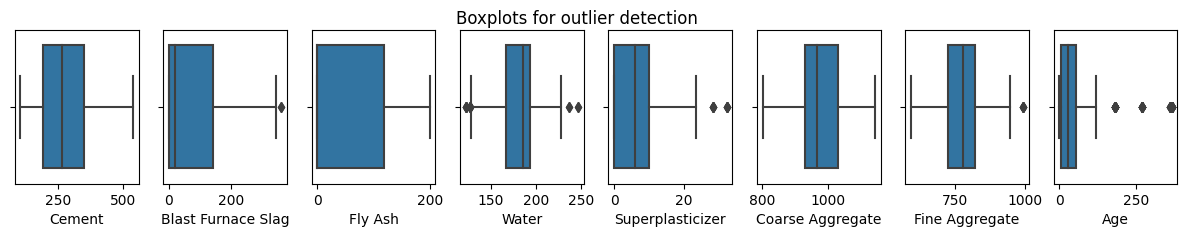

In [7]:
fig, axes = plt.subplots(1, 8, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(x=concrete_data['Cement'], ax=axes[0])
sns.boxplot(x=concrete_data['Blast Furnace Slag'], ax=axes[1])
sns.boxplot(x=concrete_data['Fly Ash'], ax=axes[2])
sns.boxplot(x=concrete_data['Water'], ax=axes[3])
sns.boxplot(x=concrete_data['Superplasticizer'], ax=axes[4])
sns.boxplot(x=concrete_data['Coarse Aggregate'], ax=axes[5])
sns.boxplot(x=concrete_data['Fine Aggregate'], ax=axes[6])
sns.boxplot(x=concrete_data['Age'], ax=axes[7])
plt.show()

In [8]:
def outlier_imputer(columns,Inter_QR):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in columns:
        # Reassign minimum to zero
        concrete_data.loc[concrete_data[col]<0, col]

        # Calculate upper threshold
        q1 = concrete_data[col].quantile(0.25)
        q3 = concrete_data[col].quantile(0.75)
        IQR = q3 - q1
        upper_threshold = q3 + (Inter_QR * IQR)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)


        # Reassign values > threshold to threshold
        concrete_data.loc[concrete_data[col] > upper_threshold, col] = upper_threshold
        print(concrete_data[col].describe().T)
        print()

In [9]:
outlier_imputer(['Blast Furnace Slag'],1.5)

Blast Furnace Slag
q3: 142.5
upper_threshold: 356.25
count    1005.000000
mean       72.037214
std        86.149994
min         0.000000
25%         0.000000
50%        20.000000
75%       142.500000
max       356.250000
Name: Blast Furnace Slag, dtype: float64



In [10]:
outlier_imputer(['Age'],1.5)

Age
q3: 56.0
upper_threshold: 129.5
count    1005.000000
mean       38.076119
std        35.862549
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       129.500000
Name: Age, dtype: float64



In [11]:
outlier_imputer(['Water'],1.5)

Water
q3: 192.9
upper_threshold: 232.35000000000002
count    1005.000000
mean      182.037313
std        21.238527
min       121.800000
25%       166.600000
50%       185.700000
75%       192.900000
max       232.350000
Name: Water, dtype: float64



In [12]:
outlier_imputer(['Superplasticizer'],1.5)

Superplasticizer
q3: 10.0
upper_threshold: 25.0
count    1005.000000
mean        5.981493
std         5.724463
min         0.000000
25%         0.000000
50%         6.100000
75%        10.000000
max        25.000000
Name: Superplasticizer, dtype: float64



In [13]:
outlier_imputer(['Fine Aggregate'],1.5)

Fine Aggregate
q3: 822.2
upper_threshold: 969.0500000000002
count    1005.000000
mean      772.571095
std        80.035934
min       594.000000
25%       724.300000
50%       780.000000
75%       822.200000
max       969.050000
Name: Fine Aggregate, dtype: float64



In [14]:
#check for basics like shape, no of samples
concrete_data.shape

(1005, 9)

<Axes: >

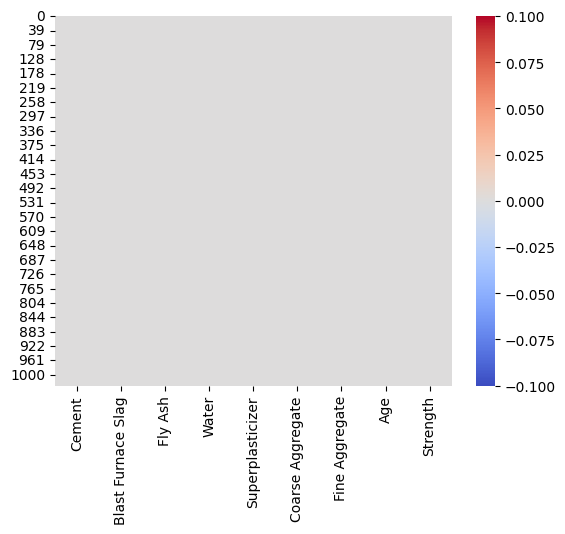

In [15]:
#check if there are null values, and discard null values
sns.heatmap(concrete_data.isnull(),cmap='coolwarm')

In [16]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Splitting data into predictors/features and target labels

In [17]:
X = concrete_data.drop('Strength',axis=1)    # (features)

In [18]:
y = concrete_data[['Strength']]       # targets

In [19]:
# check if any of the features is non-numeric (categorical/ordinal). if found convert these to ohe or other accordingly
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5


<Axes: >

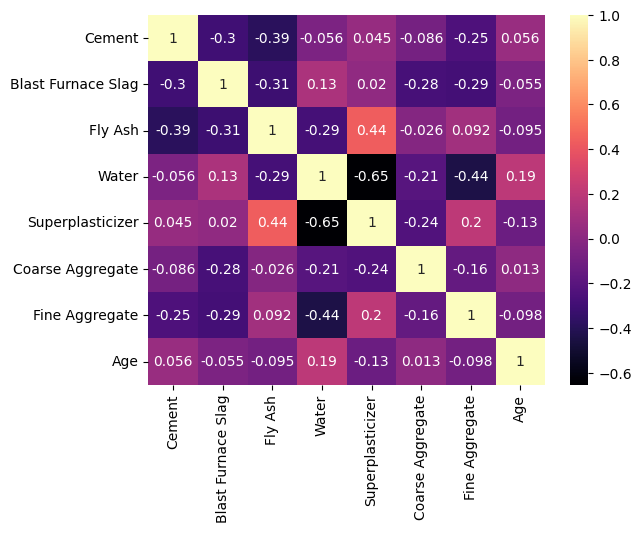

In [20]:
sns.heatmap(X.corr(),cmap='magma',annot=True)

### Train_Test Split

In [21]:
#Split the data into train / test 90:10 ratio. and keep test data separate for final test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

### Defining Model function

In [22]:
# define the regression model, use of no. of layers / units is upto you.

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                720       
                                                                 
 dense_1 (Dense)             (None, 60)                4860      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 5,641
Trainable params: 5,641
Non-trainable params: 0
_________________________________________________________________


In [24]:
#add model.compile step

optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

### A. Building a baseline model

#### Model fitting and evaluation (with non_normalized data, epochs=50) -- repeated 50 times

In [25]:
#use model.fit with non-normalized data.

model.fit(X_train,
          y_train,
          epochs=50,
          validation_split=0.2,
          batch_size=32)


Epoch 1/50
23/23 [==============================] - 5s 63ms/step - loss: 3521.7207 - mean_absolute_error: 46.2842 - val_loss: 474.9874 - val_mean_absolute_error: 17.5873
Epoch 2/50
23/23 [==============================] - 0s 18ms/step - loss: 602.3389 - mean_absolute_error: 19.5123 - val_loss: 337.1667 - val_mean_absolute_error: 14.8365
Epoch 3/50
23/23 [==============================] - 0s 19ms/step - loss: 298.4926 - mean_absolute_error: 13.7945 - val_loss: 246.4358 - val_mean_absolute_error: 12.4936
Epoch 4/50
23/23 [==============================] - 0s 19ms/step - loss: 224.8156 - mean_absolute_error: 12.2004 - val_loss: 218.4088 - val_mean_absolute_error: 11.4792
Epoch 5/50
23/23 [==============================] - 0s 14ms/step - loss: 187.3359 - mean_absolute_error: 10.9234 - val_loss: 167.3167 - val_mean_absolute_error: 10.3797
Epoch 6/50
23/23 [==============================] - 0s 12ms/step - loss: 154.9727 - mean_absolute_error: 9.9276 - val_loss: 149.1903 - val_mean_absolute_e

In [26]:
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 4ms/step


In [27]:
# evaluate mode using test data and print accuracy
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(mae)
print(mse)

7.76698099797315
92.92352338572769


## B. Modeling and Evaluation using 'normalized data'

#### Features Normalization

In [28]:
# use normalization of the cleaned data (obtained after null checking)
mean = X_train.mean(axis=0)
X_train_norm = X_train-mean
std = X_train.std(axis=0)
X_train_norm = X_train_norm/std
X_test_norm = X_test-mean
X_test_norm = X_test_norm/std


In [29]:
# use normalization of the cleaned data (obtained after null checking)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### train_test split

In [30]:
#train test split for Normalized Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=1)

### Modeling & evaluation

In [31]:
#create model with same no. of layers / units and see impact of normalized data on accuracy

model_b = keras.Sequential()
model_b.add(layers.Input(shape=(X_train.shape[1],)))
model_b.add(layers.Dense(80, activation='relu'))
model_b.add(layers.Dense(60, activation='relu'))
model_b.add(layers.Dense(1))



In [32]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_b.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

In [33]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                720       
                                                                 
 dense_4 (Dense)             (None, 60)                4860      
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 5,641
Trainable params: 5,641
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_b.fit(X_train,
          y_train,
          epochs=50,
          validation_split=0.2,
          batch_size=32)

Epoch 1/50
21/21 [==============================] - 5s 50ms/step - loss: 1452.3862 - mean_absolute_error: 34.4257 - val_loss: 1378.7917 - val_mean_absolute_error: 33.1616
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 1329.8118 - mean_absolute_error: 32.6225 - val_loss: 1233.3856 - val_mean_absolute_error: 30.9975
Epoch 3/50
21/21 [==============================] - 0s 19ms/step - loss: 1137.2195 - mean_absolute_error: 29.6260 - val_loss: 995.4711 - val_mean_absolute_error: 27.2646
Epoch 4/50
21/21 [==============================] - 0s 13ms/step - loss: 845.0065 - mean_absolute_error: 24.6985 - val_loss: 677.3344 - val_mean_absolute_error: 21.6007
Epoch 5/50
21/21 [==============================] - 0s 18ms/step - loss: 511.8573 - mean_absolute_error: 18.1738 - val_loss: 370.9292 - val_mean_absolute_error: 15.2125
Epoch 6/50
21/21 [==============================] - 0s 7ms/step - loss: 275.2128 - mean_absolute_error: 13.1946 - val_loss: 195.4745 - val_mean_absolu

In [35]:
y_pred = model_b.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [36]:
#evaluate model and print accuracy
mae_b = mean_absolute_error(y_test, y_pred)
mse_b = mean_squared_error(y_test, y_pred)

print(mae_b)
print(mse_b)

5.568775830950057
51.580856593597865


### Comparison of loss(MSE) / Accuracy between A & B (non-normalized data vs normalized data)

In [37]:
# print mse / accuracy

print(f'MSE of Non-Normalized Data : {mse} while MSE of Normalized Data is : {mse_b}')
print(f'MAE of Non-Normalized Data : {mae} while MAE of Normalized Data is : {mae_b}')


MSE of Non-Normalized Data : 92.92352338572769 while MSE of Normalized Data is : 51.580856593597865
MAE of Non-Normalized Data : 7.76698099797315 while MAE of Normalized Data is : 5.568775830950057


## C. Repeating B with 100 epochs

In [38]:
#train model at B. with 100 epochs
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=1)




In [39]:
#create model with same no. of layers / units and see impact of normalized data on accuracy
model_c = keras.Sequential()
model_c.add(layers.Input(shape=(X_train.shape[1],)))
model_c.add(layers.Dense(80, activation='relu'))
model_c.add(layers.Dense(60, activation='relu'))
model_c.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_c.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

model_c.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=32)

Epoch 1/100
19/19 [==============================] - 1s 15ms/step - loss: 1443.5701 - mean_absolute_error: 34.1931 - val_loss: 1456.7881 - val_mean_absolute_error: 34.4627
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 1324.3252 - mean_absolute_error: 32.4136 - val_loss: 1307.6700 - val_mean_absolute_error: 32.2378
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 1135.4780 - mean_absolute_error: 29.4077 - val_loss: 1059.4806 - val_mean_absolute_error: 28.2478
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 849.9454 - mean_absolute_error: 24.6549 - val_loss: 725.0013 - val_mean_absolute_error: 22.4880
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 525.5330 - mean_absolute_error: 18.7403 - val_loss: 405.9152 - val_mean_absolute_error: 15.8938
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 286.6851 - mean_absolute_error: 13.4336 - val_loss: 228.4544 - val_mean_abs

In [40]:
#evaluate and store accuracy
y_pred = model_c.predict(X_test)

mae_c = mean_absolute_error(y_test, y_pred)
mse_c = mean_squared_error(y_test, y_pred)

print(mae_c)
print(mse_c)

3/3 [==============================] - 0s 5ms/step
3.993571867826509
27.950948898411863


### Comparison of MSE between B & C (increasing epochs=50 to epochs=100)

In [41]:
# print MSE (error) and Accuracy between B, C

# With 50 epochs
print(f'with 50 epochs, mse is {mse_b} and mae is {mae_b}')

# With 100 epochs
print(f'with 100 epochs, mse is {mse_c} and mae is {mae_c}')


with 50 epochs, mse is 51.580856593597865 and mae is 5.568775830950057
with 100 epochs, mse is 27.950948898411863 and mae is 3.993571867826509


## D. Optimized the number of hidden layers using counts 3,4,...

### Model  fitting and evaluation

In [42]:
# create model as above
model_d = keras.Sequential()
model_d.add(layers.Input(shape=(X_train.shape[1],)))
model_d.add(layers.Dense(80, activation='relu'))
model_d.add(layers.Dense(60, activation='relu'))
model_d.add(layers.Dense(20, activation='relu'))
model_d.add(layers.Dense(20, activation='relu'))
model_d.add(layers.Dense(1))


optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model_d.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error'])

model_d.fit(X_train,
          y_train,
          epochs=100,
          validation_split=0.2,
          batch_size=32)



Epoch 1/100
19/19 [==============================] - 2s 19ms/step - loss: 1392.7919 - mean_absolute_error: 33.5376 - val_loss: 1336.1198 - val_mean_absolute_error: 32.8755
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 1101.8004 - mean_absolute_error: 29.1623 - val_loss: 900.0004 - val_mean_absolute_error: 25.8413
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 561.5811 - mean_absolute_error: 19.2334 - val_loss: 299.8221 - val_mean_absolute_error: 13.2717
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 211.9912 - mean_absolute_error: 11.9421 - val_loss: 204.4438 - val_mean_absolute_error: 11.1938
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 163.8831 - mean_absolute_error: 10.3352 - val_loss: 181.2870 - val_mean_absolute_error: 10.7680
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 150.9911 - mean_absolute_error: 9.8765 - val_loss: 170.3714 - val_mean_absolut

In [43]:
#repeate checking accuracy as above
y_pred = model_d.predict(X_test)

mae_d = mean_absolute_error(y_test, y_pred)
mse_d = mean_squared_error(y_test, y_pred)

print(mae_d)
print(mse_d)

3/3 [==============================] - 0s 4ms/step
3.478256065089528
19.987222438119744


## Comparison of MSE between C & D (increasing number of hidden layers)

In [44]:
#print mse / accuracy

print(f'mse is {mse_c} and mae is {mae_c}')

print(f'After increasing number of hidden layers, mse is {mse_d} and mae is {mae_d}')

mse is 27.950948898411863 and mae is 3.993571867826509
After increasing number of hidden layers, mse is 19.987222438119744 and mae is 3.478256065089528


### Conclusion

## E. Increasing the no. of units of hidden layers (16, 32,64,96, ... style)

### Model  fitting and evaluation

In [45]:
# create model as above

In [46]:
#repeate checking accuracy as above

## Comparison of MSE between C & D (increasing number of hidden layers)

In [47]:
#print mse / accuracy

In [48]:
#plots of loss / accuracy (as in chapter 4 taught) usning history dictionary keys.
# write what you saw when using non-normalized vs normalized data, increased epochs, layers and units.|

### It is therefore evident that;
#### -normalization the data, ------------------
#### -increasing the number of epochs -------------
#### -increasing the number of layers -------------
#### -and increasing the number of units ----------

1. You can use model name as modelA, modelB etc. for sections A,B,....to avoid error.
2. MSE is mean squared error normally used in regression problems